# Introduction
In this exercise, we will focus on the classification algorithms such as Naive Bayes, Logistic Regression and Decision trees.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


### Label Encoder
We mentioned label encoders in Lecture-07 examples. Let's recheck it.

<font color=#C91414>***LabelEncoder***</font> encodes labels with values between 0 and n_classes-1.

fit_transform() method fits label encoder and return encoded labels. **&rArr; label_encode_fit** returns encoded version of original data and used encoders. 
      
      
transform() method transforms labels to normalized encoding. **&rArr; label_encode**   returns encoded version of original data. Please be aware of the difference between label_encode_fit and label_encode. Label_encode_fit first fit encoders to the data and then transform the data. Then label_encode transforms data with given encoders. We apply fit and transform train data with label_encode_fit, and then transform  test data with label_decode (given train encoders) 

inverse_transform() method transform labels back to original encoding.  **&rArr; label_decode** decodes function transforms labels back to original encoding. (Models predict results in encoded version (i.e. 0,1) and by using label_decode we obtain original class values)
 

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). 


In [2]:
def label_encode_fit(data, columns):
    result = data.copy()
    encoders = {}
    for column in columns:
        encoder = preprocessing.LabelEncoder() ## Encode target labels with value between 0 and n_classes-1.
        result[column] = encoder.fit_transform(result[column]) ## Fit label encoder and return encoded labels.
        encoders[column] = encoder
    return result, encoders

def label_encode(data, encoders):
    result = data.copy()
    for column, encoder in encoders.items():
        if column in data.columns:
            result[column] = encoder.transform(result[column]) ##Transform labels to normalized encoding.
    return result    

def label_decode(data, encoders):
    result = data.copy()
    for column, encoder in encoders.items():
        if column in data.columns:
            result[column] = encoder.inverse_transform(result[column]) ##Transform labels back to original encoding.
    return result

## Classification
The classification task is simply predicting categorical class labels. For the classification task, we will review some algorithms. Naive Bayes is one of them.

### Naive Bayes

Naive Bayes is a classification algorithm that depends on the Bayesian Theorem and assumes that conditional independence between every pair of features given the value of the class variable. 

There are some types of Naive Bayes algorithms such as Categorical NB, Gaussian NB, Multinomial NB, Complement NB, and Bernouilli NB. For this exercise, we will go over only the first two of them. They are Categorical NB and Gaussin NB.

<font color=#C91414>***CategoricalNB***</font> implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index, has its own categorical distribution.

fit() method fits Naive Bayes classifier.  
predict() method performs classification on an array of test vectors X.   
predict_proba() method returns probability estimates for the test vector X.

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB). 

#### Buying Computer - Naive Bayes
You can find buying car example in the lecture notes below.

In [3]:
buying_computer_data = pd.DataFrame({
    'age': ['<=30','<=30','31..40','>40','>40','>40','31..40','<=30','<=30','>40','<=30','31..40','31..40','>40'],
    'income': ['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'student': ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rating': ['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
    'buys_computer': ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
})

buying_computer_data

age  income student credit_rating buys_computer
0     <=30    high      no          fair            no
1     <=30    high      no     excellent            no
2   31..40    high      no          fair           yes
3      >40  medium      no          fair           yes
4      >40     low     yes          fair           yes
5      >40     low     yes     excellent            no
6   31..40     low     yes     excellent           yes
7     <=30  medium      no          fair            no
8     <=30     low     yes          fair           yes
9      >40  medium     yes          fair           yes
10    <=30  medium     yes     excellent           yes
11  31..40  medium      no     excellent           yes
12  31..40    high     yes          fair           yes
13     >40  medium      no     excellent            no

In [4]:
data1, encoders1 = label_encode_fit(buying_computer_data, buying_computer_data.columns) ## data1 is encoded version of original data ,  encoders1 show used encoders
model1 = CategoricalNB()
X1 = data1.iloc[:,:-1] # select columns ['age','income','student','credit_rating']
y1 = data1.iloc[:,-1] # select column ['buys_computer']
model1.fit(X1, y1)
data1['pred'] = model1.predict(X1) 
encoders1['pred'] = encoders1['buys_computer']
label_decode(data1,encoders1) ## models predict results in encoded version (0,1), decode function transforms labels back to original encoding

age  income student credit_rating buys_computer pred
0     <=30    high      no          fair            no   no
1     <=30    high      no     excellent            no   no
2   31..40    high      no          fair           yes  yes
3      >40  medium      no          fair           yes  yes
4      >40     low     yes          fair           yes  yes
5      >40     low     yes     excellent            no  yes
6   31..40     low     yes     excellent           yes  yes
7     <=30  medium      no          fair            no   no
8     <=30     low     yes          fair           yes  yes
9      >40  medium     yes          fair           yes  yes
10    <=30  medium     yes     excellent           yes  yes
11  31..40  medium      no     excellent           yes  yes
12  31..40    high     yes          fair           yes  yes
13     >40  medium      no     excellent            no   no

In [5]:
data1.head()

age  income  student  credit_rating  buys_computer  pred
0    1       0        0              1              0     0
1    1       0        0              0              0     0
2    0       0        0              1              1     1
3    2       2        0              1              1     1
4    2       1        1              1              1     1

In [6]:
test1 = pd.DataFrame({'age': '<=30', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, index=[1])
test1 = label_encode(test1, encoders1)
print('probabilities: ', model1.predict_proba(test1))
test1['buys_computer'] = model1.predict(test1)
label_decode(test1, encoders1)

probabilities:  [[0.23217141 0.76782859]]


age  income student credit_rating buys_computer
1  <=30  medium     yes          fair           yes

#### Car Evaluation - Naive Bayes
Another example of Naive Bayes with car evaluation data set. The data set is retrieved from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
* buying: vhigh, high, med, low.
* maint: vhigh, high, med, low.
* doors: 2, 3, 4, 5more.
* persons: 2, 4, more.
* lug_boot: small, med, big.
* safety: low, med, high. 
* acceptability: unacc, acc, good, vgood 

In [7]:
car_evaluation_data = pd.read_csv('car.data', header=None)
car_evaluation_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
car_evaluation_data

buying  maint  doors persons lug_boot safety acceptability
0     vhigh  vhigh      2       2    small    low         unacc
1     vhigh  vhigh      2       2    small    med         unacc
2     vhigh  vhigh      2       2    small   high         unacc
3     vhigh  vhigh      2       2      med    low         unacc
4     vhigh  vhigh      2       2      med    med         unacc
...     ...    ...    ...     ...      ...    ...           ...
1723    low    low  5more    more      med    med          good
1724    low    low  5more    more      med   high         vgood
1725    low    low  5more    more      big    low         unacc
1726    low    low  5more    more      big    med          good
1727    low    low  5more    more      big   high         vgood

[1728 rows x 7 columns]

In [8]:
data2, encoders2 = label_encode_fit(car_evaluation_data, car_evaluation_data.columns)  ## data2 is encoded version of car evaluation data ,  encoders2 show used encoders
X2 = data2.iloc[:,:-1] # select columns ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
y2 = data2.iloc[:,-1] # select ['acceptability']

model2 = CategoricalNB()
model2.fit(X2, y2)
data2['pred'] = model2.predict(X2)
print('accuracy: ', metrics.accuracy_score(data2['acceptability'], data2['pred']))
print('confusion matrix:')
print(metrics.confusion_matrix(data2['acceptability'], data2['pred']))
encoders2['pred'] = encoders2['acceptability']

accuracy:  0.8715277777777778
confusion matrix:
[[ 287   10   87    0]
 [  46   21    0    2]
 [  45    2 1163    0]
 [  30    0    0   35]]


In [9]:
# OR ...
conf = label_decode(data2, encoders2).groupby(['acceptability','pred']).size() ## models predict results in encoded version (0,1,2,2), decode function transforms labels back to original encoding
conf.reset_index().pivot(index='acceptability', columns='pred', values=0).fillna(0).astype(int)

pred           acc  good  unacc  vgood
acceptability                         
acc            287    10     87      0
good            46    21      0      2
unacc           45     2   1163      0
vgood           30     0      0     35

#### Train-Test Split
For this example, let's split data into train and test set and repeat the previous model built steps.

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0) ##Split arrays or matrices into random train and test subsets

model2_2 = CategoricalNB() 
model2_2.fit(X2_train, y2_train) 
y2_train_pred = model2_2.predict(X2_train) 
print('train accuracy = ', metrics.accuracy_score(y2_train, y2_train_pred))
y2_test_pred = model2_2.predict(X2_test)
print('test accuracy = ', metrics.accuracy_score(y2_test_pred, y2_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y2_test_pred, y2_test))


train accuracy =  0.869313482216708
test accuracy =  0.8208092485549133
test confusion matrix:
 [[ 72  20  19   9]
 [  5   3   0   0]
 [ 38   0 344   0]
 [  0   2   0   7]]


<font color=#C91414>***GaussianNB***</font> implements the Gaussian Naive Bayes algorithm for classification.

fit() method fits Gaussian Naive Bayes classifier.  
predict() method performs classification on an array of test vectors X.   

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB). 

### IRIS - Naive Bayes
In this example, GaussianNB is used because features are continuous

In [11]:
X3, y3 = load_iris(return_X_y=True)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1) ##Split arrays or matrices into random train and test subsets
model3 = GaussianNB() 
model3.fit(X3_train, y3_train)
y3_train_pred = model3.predict(X3_train)
print('train accuracy = ', metrics.accuracy_score(y3_train, y3_train_pred))
y3_test_pred = model3.predict(X3_test)
print('test accuracy = ', metrics.accuracy_score(y3_test_pred, y3_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y3_test_pred, y3_test))

train accuracy =  0.9523809523809523
test accuracy =  0.9333333333333333
test confusion matrix:
 [[14  0  0]
 [ 0 16  1]
 [ 0  2 12]]


## Decision Tree

Decision tree algorithms can be used for both regression and classification tasks. Here, we will talk about DecisionTreeClassifier. But before we talk about the decision trees, we will review another encoding method. In the buying computer example, there is an ordinal relationship between some feature categories. For example, income feature &rArr; low < medium< high. The rationale encoding of these categories should be low:0, medium:1 and high:2.    

Remember, the label encoder gives arbitrary ordering. Please see data1 in 5th code cell for the label encoder version of this example  &rArr; low:1, medium:2 and high:0. 

<font color=#C91414>***OrdinalEncoder***</font> converts features to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.


You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)


<font color=#C91414>***DecisionTreeClassifier***</font> 

fit() method builds a decision tree classifier from the training set (X, y).  
predict() method predicts a class value for X. 
feature_importances_ attribute returns the feature importances.

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). 


#### Buying Computer - Decision Tree

In [12]:
categories4 = [
    ['<=30', '31..40', '>40'], # age
    ['low', 'medium', 'high'], # income
    ['no', 'yes'], # student
    ['fair', 'excellent'], # credit rating
    ['no', 'yes'] # buys computer
]

encoder4 = preprocessing.OrdinalEncoder(categories=categories4)
data4 = pd.DataFrame(encoder4.fit_transform(buying_computer_data), columns=buying_computer_data.columns)
data4.head()

age  income  student  credit_rating  buys_computer
0  0.0     2.0      0.0            0.0            0.0
1  0.0     2.0      0.0            1.0            0.0
2  1.0     2.0      0.0            0.0            1.0
3  2.0     1.0      0.0            0.0            1.0
4  2.0     0.0      1.0            0.0            1.0

In [13]:
X4 = data4.iloc[:,:-1] # select columns [age, income, student, credit_rating]
y4 = data4.iloc[:,-1] # select column buys_computer

model4 = DecisionTreeClassifier(criterion='entropy') # try criterion = entropy or gini  
model4.fit(X4,y4)
y4_pred = model4.predict(X4)
print('accuracy: ', metrics.accuracy_score(y4, y4_pred))

accuracy:  1.0


### Visualize Tree using graphviz
* install package by: 'conda install python-graphviz'

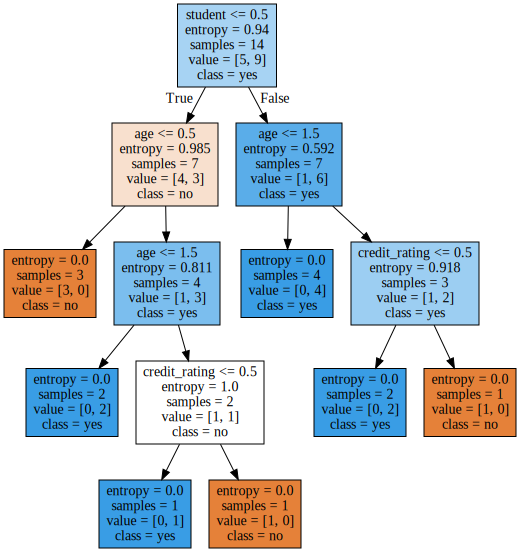

In [14]:
import graphviz
model4_data = tree.export_graphviz(model4, out_file=None, filled=True, feature_names=X4.columns, class_names=categories4[-1])
graph = graphviz.Source(model4_data)
graph
### visualization is based on feature importances

In [15]:
test1 = pd.DataFrame({'age': '<=30', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair', 'buys_computer': 'no'}, index=[1]) #ignore buys_computer, it is just needed for encoding!
test1 = pd.DataFrame(encoder4.transform(test1), columns=test1.columns)
pred = model1.predict(test1.iloc[:,:-1])
print('prediction: ', categories4[-1][pred[0]])

prediction:  yes


### Car Evaluation - Decision Tree

In [16]:
categories5 = [
    ['low', 'med', 'high', 'vhigh'], # buying
    ['low', 'med', 'high', 'vhigh'], # maint
    ['2', '3', '4', '5more'], # doors
    ['2', '4', 'more'], # persons
    ['small', 'med', 'big'], # lug_boot
    ['low', 'med', 'high'], # safety
    ['unacc', 'acc', 'good', 'vgood'] # acceptability
]

encoder5 = preprocessing.OrdinalEncoder(categories=categories5)
data5 = pd.DataFrame(encoder5.fit_transform(car_evaluation_data), columns=car_evaluation_data.columns)
data5.head()

buying  maint  doors  persons  lug_boot  safety  acceptability
0     3.0    3.0    0.0      0.0       0.0     0.0            0.0
1     3.0    3.0    0.0      0.0       0.0     1.0            0.0
2     3.0    3.0    0.0      0.0       0.0     2.0            0.0
3     3.0    3.0    0.0      0.0       1.0     0.0            0.0
4     3.0    3.0    0.0      0.0       1.0     1.0            0.0

In [17]:
X5 = data5.iloc[:,:-1] # select columns [age, income, student, credit_rating]
y5 = data5.iloc[:,-1] # select column buys_computer
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=1) ##Split arrays or matrices into random train and test subsets

model5 = DecisionTreeClassifier(criterion='entropy', max_depth=3) # try criterion = entropy or gini, depth=3..30 
model5.fit(X5_train, y5_train)
y5_train_pred = model5.predict(X5_train)
print('train accuracy = ', metrics.accuracy_score(y5_train, y5_train_pred))
y5_test_pred = model5.predict(X5_test)
print('test accuracy = ', metrics.accuracy_score(y5_test_pred, y5_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y5_test_pred, y5_test))


train accuracy =  0.7981803143093466
test accuracy =  0.7764932562620424
test confusion matrix:
 [[352  60   0   0]
 [ 16  51  22  18]
 [  0   0   0   0]
 [  0   0   0   0]]


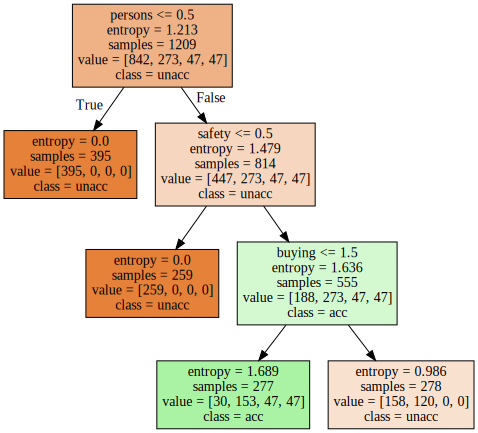

In [18]:
model5_data = tree.export_graphviz(model5, out_file=None, filled=True, feature_names=X5.columns, class_names=categories5[-1])
graph = graphviz.Source(model5_data)
graph

In [19]:
for d in range(3,20):
    m = DecisionTreeClassifier(criterion='entropy', max_depth=d) # try gini or entropy for criterion
    m.fit(X5_train, y5_train)
    y5_test_pred = m.predict(X5_test)
    print('max_depth =', d, '  acc = ', metrics.accuracy_score(y5_test_pred, y5_test))

max_depth = 3   acc =  0.7764932562620424
max_depth = 4   acc =  0.8554913294797688
max_depth = 5   acc =  0.8670520231213873
max_depth = 6   acc =  0.8998073217726397
max_depth = 7   acc =  0.9344894026974951
max_depth = 8   acc =  0.9421965317919075
max_depth = 9   acc =  0.9556840077071291
max_depth = 10   acc =  0.9576107899807321
max_depth = 11   acc =  0.9633911368015414
max_depth = 12   acc =  0.9518304431599229
max_depth = 13   acc =  0.9518304431599229
max_depth = 14   acc =  0.9556840077071291
max_depth = 15   acc =  0.9672447013487476
max_depth = 16   acc =  0.9633911368015414
max_depth = 17   acc =  0.9518304431599229
max_depth = 18   acc =  0.9595375722543352
max_depth = 19   acc =  0.9672447013487476


### IRIS - Decision Tree

In [20]:
data6 = load_iris()
X6 = data6.data
y6 = data6.target
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=1) ##Split arrays or matrices into random train and test subsets
model6 = DecisionTreeClassifier(max_depth=10) # try 2,3,4
model6.fit(X6_train, y6_train)
y6_train_pred = model6.predict(X6_train)
print('train accuracy = ', metrics.accuracy_score(y6_train, y6_train_pred))
y6_test_pred = model6.predict(X6_test)
print('test accuracy = ', metrics.accuracy_score(y6_test_pred, y6_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y6_test_pred, y6_test))

train accuracy =  1.0
test accuracy =  0.9555555555555556
test confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


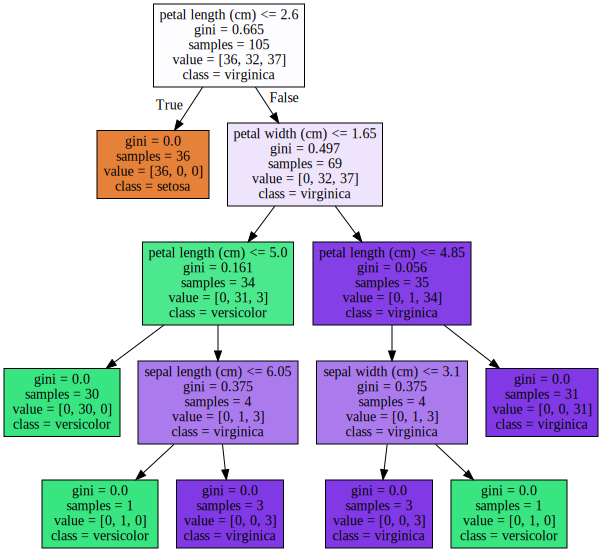

In [21]:
model6_data = tree.export_graphviz(model6, out_file=None, filled=True, feature_names=data6.feature_names, class_names=data6.target_names)
graph = graphviz.Source(model6_data)
graph

## Logistic Regression

Logistic regression turns linear predictions into probabilities by using the logistic (sigmoid) function.


<font color=#C91414>***LogisticRegression***</font> builts logistic regression classifier.

fit() method fits the model according to the given training data. 
predict() method predicts class labels for samples in X.
If multi_class parameter set as ‘ovr’, then a binary problem is fit for each label.


You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 


#### IRIS - Logistic Regression

In [22]:
data9 = load_iris()
X9 = data9.data
y9 = data9.target
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=2) ##Split arrays or matrices into random train and test subsets
model9 = LogisticRegression(multi_class='ovr', C=2)
model9.fit(X9_train, y9_train)
y9_train_pred = model9.predict(X9_train)
print('train accuracy = ', metrics.accuracy_score(y9_train, y9_train_pred))
y9_test_pred = model9.predict(X9_test)
print('test accuracy = ', metrics.accuracy_score(y9_test_pred, y9_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y9_test_pred, y9_test))

train accuracy =  0.9523809523809523
test accuracy =  0.9555555555555556
test confusion matrix:
 [[17  0  0]
 [ 0 13  0]
 [ 0  2 13]]


Note: You can see Lecture-7 codes for Polynomial Features explanations.

In [23]:
poly9 = preprocessing.PolynomialFeatures(2) ##### Generate polynomial and interaction features
X9_poly = poly9.fit_transform(X9)
y9_poly = data9.target
X9p_train, X9p_test, y9p_train, y9p_test = train_test_split(X9_poly, y9_poly, test_size=0.3, random_state=2) ##Split arrays or matrices into random train and test subsets
model9p = LogisticRegression(multi_class='ovr', C=0.1, max_iter=10000)
model9p.fit(X9p_train, y9p_train)
y9p_train_pred = model9p.predict(X9p_train)
print('train accuracy = ', metrics.accuracy_score(y9p_train, y9p_train_pred))
y9p_test_pred = model9p.predict(X9p_test)
print('test accuracy = ', metrics.accuracy_score(y9p_test_pred, y9p_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y9p_test_pred, y9p_test))

train accuracy =  0.9809523809523809
test accuracy =  1.0
test confusion matrix:
 [[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


### Car Evaluation - Logistic Regression

In [24]:
encoder8 = preprocessing.OneHotEncoder(drop='first')
X8 = encoder8.fit_transform(car_evaluation_data.iloc[:,:-1])
lencoder = preprocessing.LabelEncoder()
y8 = lencoder.fit_transform(car_evaluation_data.iloc[:,-1])
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=2) ##Split arrays or matrices into random train and test subsets
model8 = LogisticRegression(multi_class='ovr', C=10, max_iter=10000)
model8.fit(X8_train, y8_train)
y8_train_pred = model8.predict(X8_train)
print('train accuracy = ', metrics.accuracy_score(y8_train, y8_train_pred))
y8_test_pred = model8.predict(X8_test)
print('test accuracy = ', metrics.accuracy_score(y8_test_pred, y8_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y8_test_pred, y8_test))

train accuracy =  0.9081885856079405
test accuracy =  0.8651252408477842
test confusion matrix:
 [[ 90  15  19  10]
 [  4   7   1   0]
 [ 20   0 347   0]
 [  0   1   0   5]]


In [25]:
# OR ...
pd.DataFrame(metrics.confusion_matrix(y8_test_pred, y8_test), index=lencoder.classes_, columns=lencoder.classes_)

acc  good  unacc  vgood
acc     90    15     19     10
good     4     7      1      0
unacc   20     0    347      0
vgood    0     1      0      5